In [141]:
#importing required libraries

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [142]:
#Loading data into dataframe

data = pd.read_csv("phishing1.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [143]:
#Shape of dataframe
data.shape

(10001, 32)

In [144]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [145]:
#Information about the dataset
data = data.drop(['Index'],axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              10001 non-null  int64
 1   LongURL              10001 non-null  int64
 2   ShortURL             10001 non-null  int64
 3   Symbol@              10001 non-null  int64
 4   Redirecting//        10001 non-null  int64
 5   PrefixSuffix-        10001 non-null  int64
 6   SubDomains           10001 non-null  int64
 7   HTTPS                10001 non-null  int64
 8   DomainRegLen         10001 non-null  int64
 9   Favicon              10001 non-null  int64
 10  NonStdPort           10001 non-null  int64
 11  HTTPSDomainURL       10001 non-null  int64
 12  RequestURL           10001 non-null  int64
 13  AnchorURL            10001 non-null  int64
 14  LinksInScriptTags    10001 non-null  int64
 15  ServerFormHandler    10001 non-null  int64
 16  InfoEmail            1

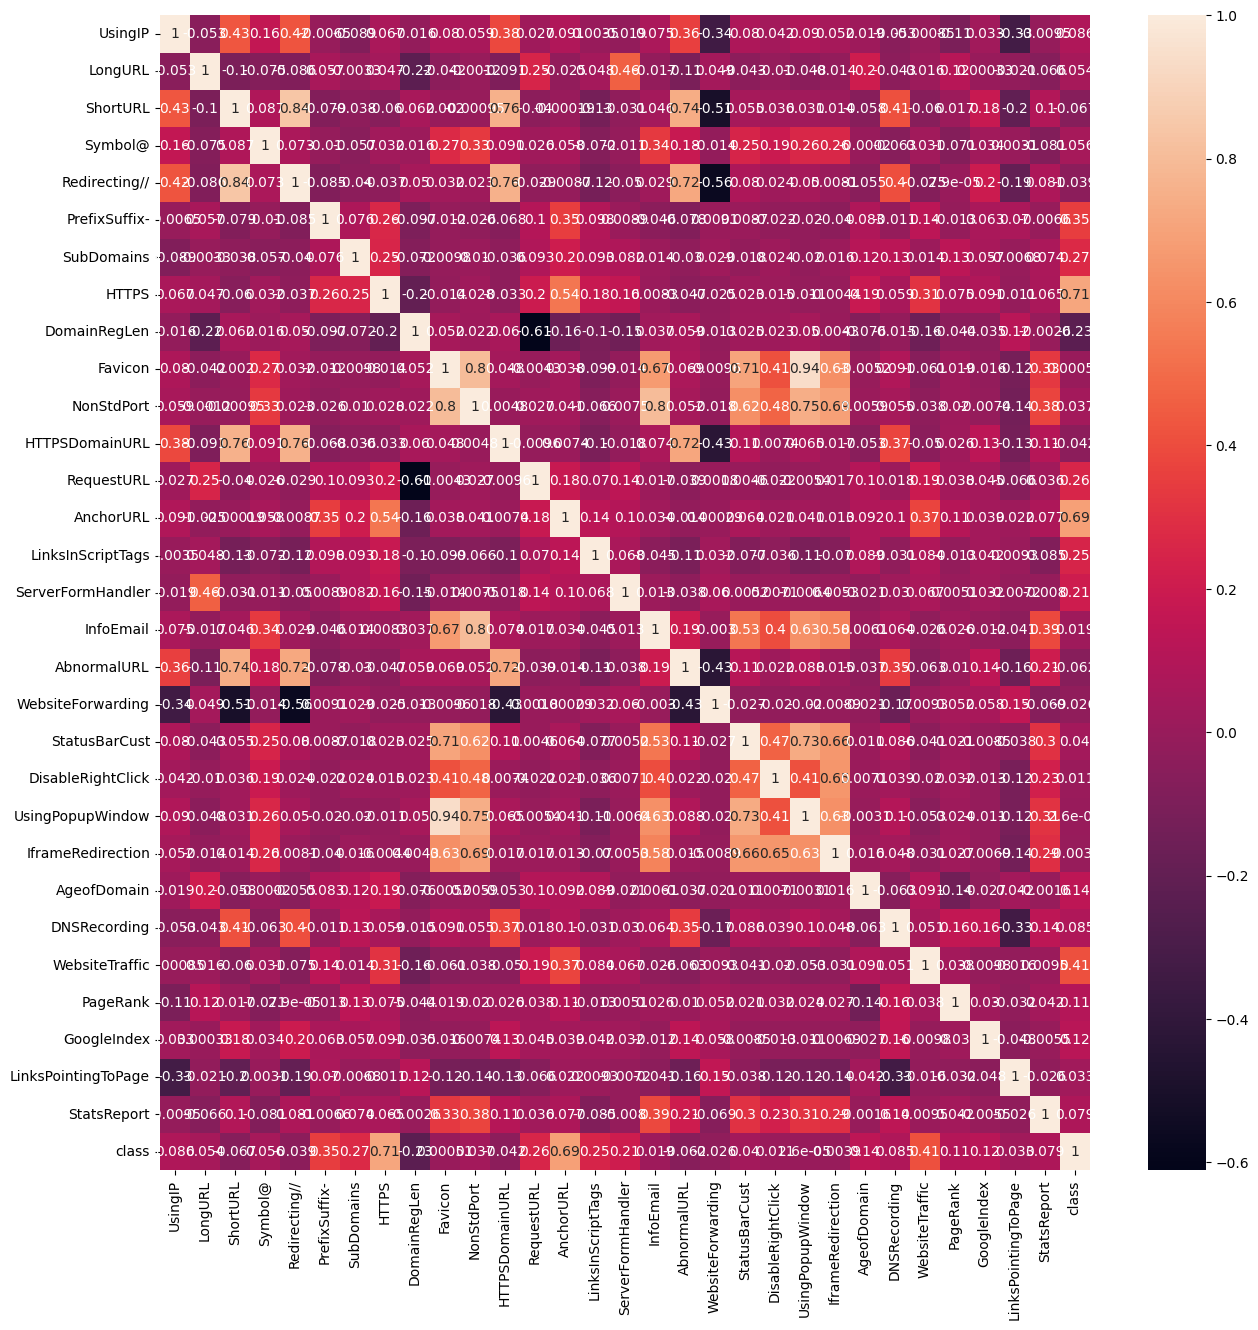

In [146]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

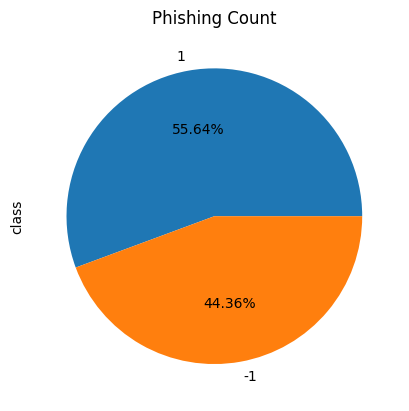

In [147]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [148]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [149]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 30), (8000,), (2001, 30), (2001,))

In [150]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a, b, c, d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
  

## Decision Trees : Classifier



In [151]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [152]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [153]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))


Decision Tree : Accuracy on training Data: 0.992
Decision Tree : Accuracy on test Data: 0.959
Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.961

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.962


In [154]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       918
           1       0.96      0.96      0.96      1083

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



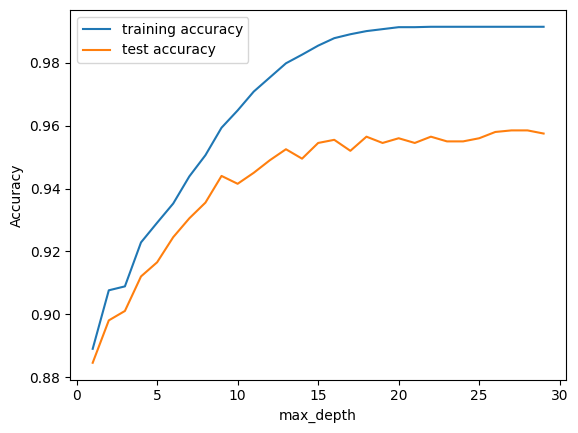

In [155]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();


In [156]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_test_tree,precision_score_test_tree)

## Random Forest

In [157]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()


Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.969



In [158]:
f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.972

Random Forest : Recall on training Data: 0.994
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.962


In [159]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       918
           1       0.97      0.98      0.97      1083

    accuracy                           0.97      2001
   macro avg       0.97      0.97      0.97      2001
weighted avg       0.97      0.97      0.97      2001



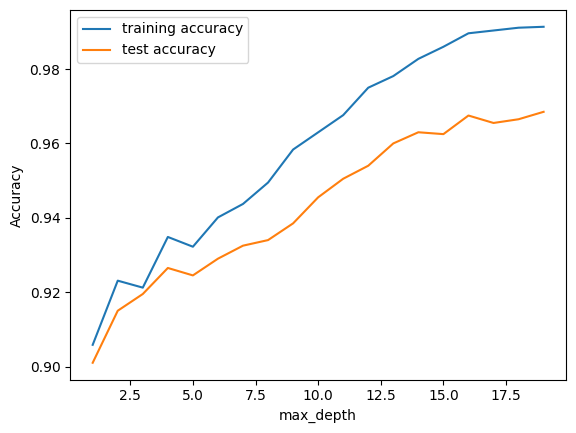

In [160]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(max_depth=n)

    forest_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [161]:
#Storing results

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_test_forest,precision_score_test_forest)

## LightGBM

In [162]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

y_train_lgb =lgb.predict(X_train)
y_test_lgb = lgb.predict(X_test)

acc_train_lgb = metrics.accuracy_score(y_train,y_train_lgb)
acc_test_lgb = metrics.accuracy_score(y_test,y_test_lgb)

print("LightGBM : Accuracy on training data : {:.3f}".format(acc_train_lgb))
print("LightGBM : Accuracy on test data : {:.3f}".format(acc_test_lgb))

f1_score_train_lgb= metrics.f1_score(y_train,y_train_lgb)
f1_score_test_lgb = metrics.f1_score(y_test,y_test_lgb)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_lgb))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_lgb))
print()

recall_score_train_lgb = metrics.recall_score(y_train,y_train_lgb)
recall_score_test_lgb = metrics.recall_score(y_test,y_test_lgb)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_lgb))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_lgb))
print()

precision_score_train_lgb = metrics.precision_score(y_train,y_train_lgb)
precision_score_test_lgb = metrics.precision_score(y_test,y_test_lgb)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_lgb))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_lgb))

LightGBM : Accuracy on training data : 0.982
LightGBM : Accuracy on test data : 0.960
Logistic Regression : f1_score on training Data: 0.984
Logistic Regression : f1_score on test Data: 0.963

Logistic Regression : Recall on training Data: 0.985
Logistic Regression : Recall on test Data: 0.965

Logistic Regression : precision on training Data: 0.982
Logistic Regression : precision on test Data: 0.961


In [163]:
print(metrics.classification_report(y_test, y_test_lgb))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       918
           1       0.96      0.96      0.96      1083

    accuracy                           0.96      2001
   macro avg       0.96      0.96      0.96      2001
weighted avg       0.96      0.96      0.96      2001



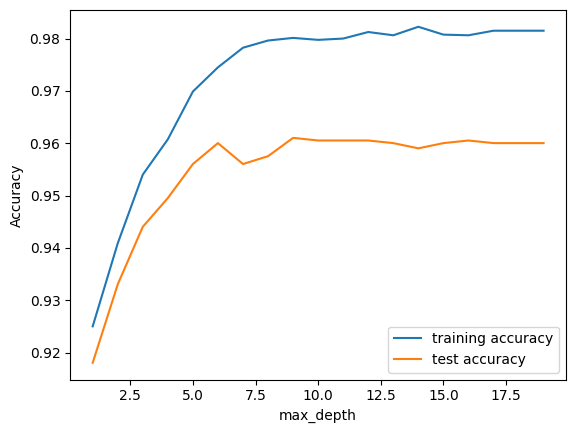

In [164]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    lgb_test =  LGBMClassifier(max_depth=n)

    lgb_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(lgb_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lgb_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [165]:
storeResults('LightGBM',acc_test_lgb,f1_score_test_lgb,recall_score_test_lgb,precision_score_test_lgb)

## Logistic Regression

In [166]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.930
Logistic Regression : Accuracy on test Data: 0.921

Logistic Regression : f1_score on training Data: 0.938
Logistic Regression : f1_score on test Data: 0.928

Logistic Regression : Recall on training Data: 0.947
Logistic Regression : Recall on test Data: 0.935

Logistic Regression : precision on training Data: 0.929
Logistic Regression : precision on test Data: 0.920


In [167]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       918
           1       0.92      0.94      0.93      1083

    accuracy                           0.92      2001
   macro avg       0.92      0.92      0.92      2001
weighted avg       0.92      0.92      0.92      2001



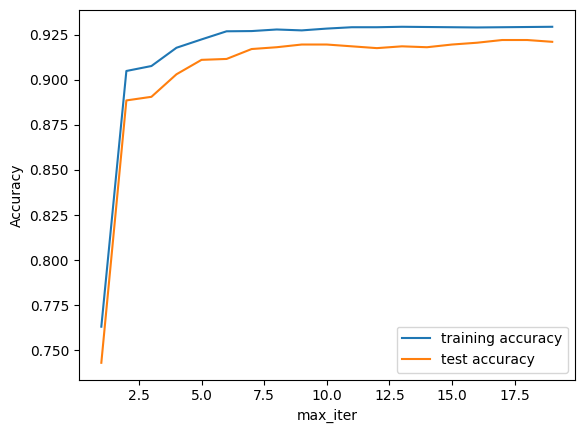

In [168]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    log_test =  LogisticRegression(max_iter=n)

    log_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(log_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(log_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

In [169]:
storeResults('Logical Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

## Support Vector Machine

In [170]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)


acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()
f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))


Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.955

Support Vector Machine : f1_score on training Data: 0.972
Support Vector Machine : f1_score on test Data: 0.958

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.966

Support Vector Machine : precision on training Data: 0.964
Support Vector Machine : precision on test Data: 0.951


In [171]:
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       918
           1       0.95      0.97      0.96      1083

    accuracy                           0.95      2001
   macro avg       0.95      0.95      0.95      2001
weighted avg       0.95      0.95      0.95      2001



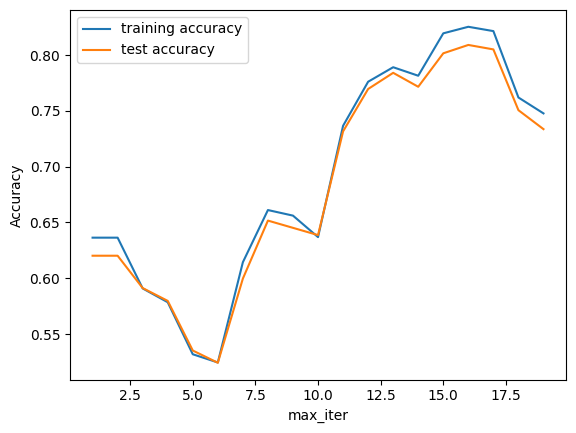

In [172]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    svc_test =  SVC(max_iter=n)

    svc_test.fit(X_train, y_train) 
    # record training set accuracy
    training_accuracy.append(svc_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_iter")
plt.legend();

In [173]:
storeResults('Suport Vector Machine',acc_test_svc,f1_score_test_svc,recall_score_train_svc,precision_score_train_svc)

## Comparision of Models


In [174]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
result
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.969,0.972,0.977,0.962
1,LightGBM,0.960,0.963,0.965,0.961
2,Decision Tree,0.959,0.962,0.961,0.962
3,Suport Vector Machine,0.955,0.958,0.980,0.964
4,Logical Regression,0.921,0.928,0.947,0.929


In [175]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.959,0.962,0.961,0.962
1,Random Forest,0.969,0.972,0.977,0.962
2,LightGBM,0.960,0.963,0.965,0.961
3,Logical Regression,0.921,0.928,0.947,0.929
4,Suport Vector Machine,0.955,0.958,0.980,0.964


In [176]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy'],ascending=False).reset_index(drop=True)

In [177]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.969,0.972,0.977,0.962
1,LightGBM,0.960,0.963,0.965,0.961
2,Decision Tree,0.959,0.962,0.961,0.962
3,Suport Vector Machine,0.955,0.958,0.980,0.964
4,Logical Regression,0.921,0.928,0.947,0.929


In [178]:


# instantiate the model
forest1 = RandomForestClassifier(n_estimators=10)

 


In [179]:
# Creating holders to store the model performance results
ML_Model1 = []
accuracy1 = []
f1_score1 = []
recall1 = []
precision1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d):
  ML_Model1.append(model)
  accuracy1.append(round(a, 3))
  f1_score1.append(round(b, 3))
  recall1.append(round(c, 3))
  precision1.append(round(d, 3))
  

## Random Forest Classifier Feature Importance

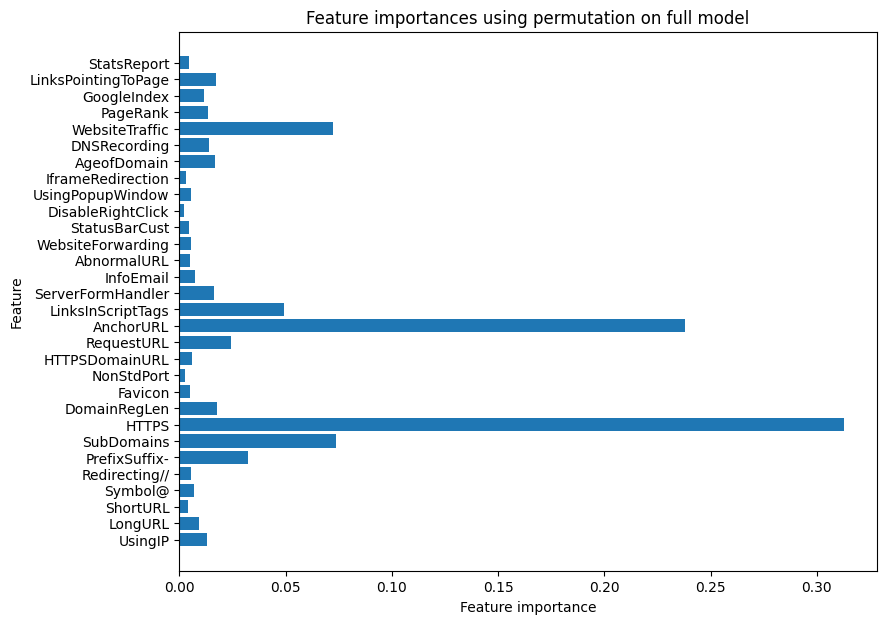

In [180]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Random Forest Classifier With PCA

In [181]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=20)
pca.fit(X)
X_new=pca.transform(X)

In [182]:
print(pca.explained_variance_ratio_)

[0.1539162  0.11972256 0.11173714 0.06751747 0.06533843 0.0531691
 0.04329753 0.03825161 0.03681452 0.03207345 0.03000787 0.02841241
 0.02766596 0.02399675 0.02316661 0.02020069 0.01951247 0.01552536
 0.01385853 0.01307596]


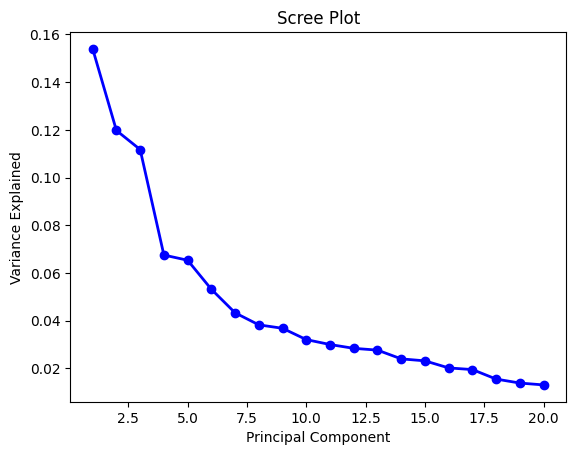

In [183]:
import matplotlib.pyplot as plt
import numpy as np
values=np.arange(pca.n_components_)+1
plt.plot(values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [184]:
print(pca.singular_values_)

[163.49431769 144.1944324  139.30261453 108.28506819 106.52335439
  96.09264519  86.71457009  81.5052027   79.95950446  74.63341375
  72.19017108  70.24485418  69.31598512  64.55601912  63.4295622
  59.23025104  58.21254882  51.92557153  49.0590445   47.65376822]


In [185]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [186]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier()

# fit the model 
forest2.fit(X_train1,y_train1)

#predicting the target value from the model for the samples
y_train_forest = forest2.predict(X_train1)
y_test_forest = forest2.predict(X_test1)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train1,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test1,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))


Random Forest : Accuracy on training Data: 0.992
Random Forest : Accuracy on test Data: 0.961

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.964

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.970

Random Forest : precision on training Data: 0.990
Random Forest : precision on test Data: 0.962


In [187]:
storeResults1('Random Forest',acc_test_forest,f1_score_test_forest,recall_score_train_forest,precision_score_train_forest)

In [188]:
import pickle

# dump information to that file
pickle.dump(forest2, open('model1.pkl', 'wb'))

## Decision Tree Feature Importance

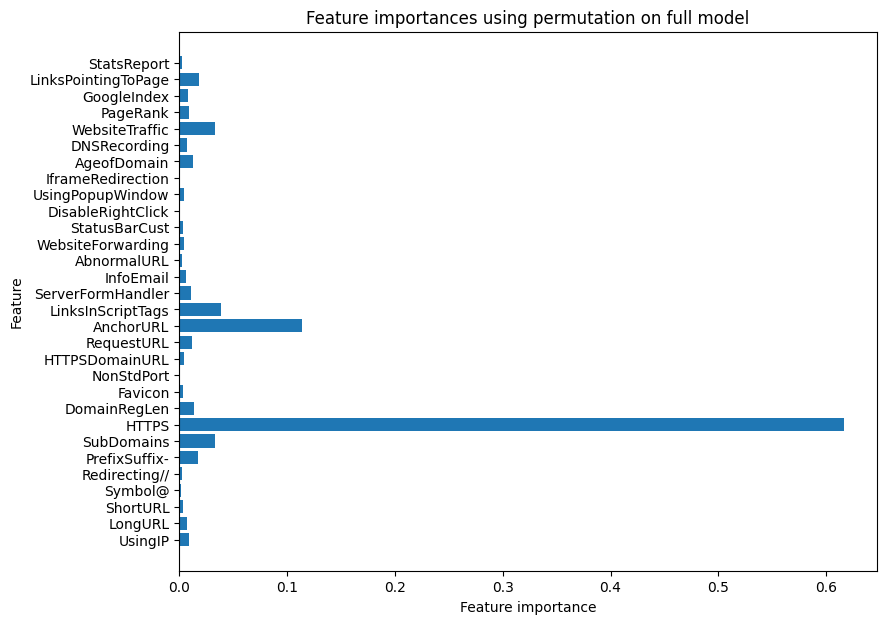

In [189]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Decision Tree with Sequential Feature Selector

In [190]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

In [191]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [192]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train2, y_train2)

#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train2)
y_test_tree = tree.predict(X_test2)

acc_train_tree = metrics.accuracy_score(y_train2,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test2,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()
f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.992
Decision Tree : Accuracy on test Data: 0.936

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.941

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.951

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.932


In [193]:
storeResults1('Decision Tree',acc_test_tree,f1_score_test_tree,recall_score_train_tree,precision_score_train_tree)

## LightGBM feature Importance

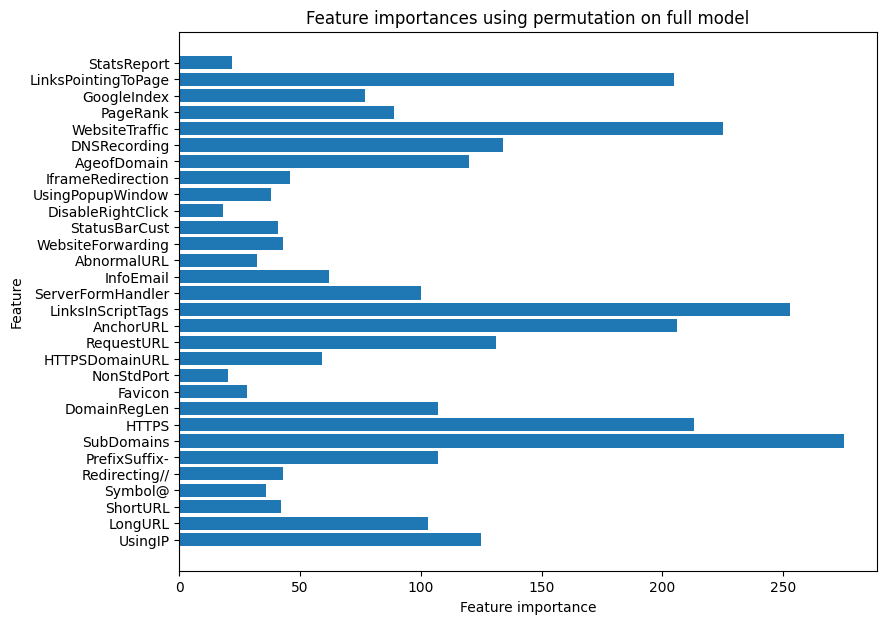

In [194]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), lgb.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## LightGBM with Sequential Feature Selector

In [195]:
from lightgbm import LGBMClassifier
lgb1 = LGBMClassifier()

In [196]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train3.shape, y_train3.shape, X_test3.shape, y_test3.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [197]:
from lightgbm import LGBMClassifier
lgb2 = LGBMClassifier()
lgb2.fit(X_train3,y_train3)

y_train_lgb =lgb2.predict(X_train3)
y_test_lgb = lgb2.predict(X_test3)

acc_train_lgb = metrics.accuracy_score(y_train3,y_train_lgb)
acc_test_lgb = metrics.accuracy_score(y_test3,y_test_lgb)

print("LightGBM : Accuracy on training data : {:.3f}".format(acc_train_lgb))
print("LightGBM : Accuracy on test data : {:.3f}".format(acc_test_lgb))
print()
f1_score_train_lgb= metrics.f1_score(y_train,y_train_lgb)
f1_score_test_lgb = metrics.f1_score(y_test,y_test_lgb)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_lgb))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_lgb))
print()

recall_score_train_lgb = metrics.recall_score(y_train,y_train_lgb)
recall_score_test_lgb = metrics.recall_score(y_test,y_test_lgb)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_lgb))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_lgb))
print()

precision_score_train_lgb = metrics.precision_score(y_train,y_train_lgb)
precision_score_test_lgb = metrics.precision_score(y_test,y_test_lgb)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_lgb))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_lgb))

LightGBM : Accuracy on training data : 0.991
LightGBM : Accuracy on test data : 0.959

Logistic Regression : f1_score on training Data: 0.992
Logistic Regression : f1_score on test Data: 0.962

Logistic Regression : Recall on training Data: 0.994
Logistic Regression : Recall on test Data: 0.970

Logistic Regression : precision on training Data: 0.990
Logistic Regression : precision on test Data: 0.954


In [198]:
storeResults1('LightGBM',acc_test_lgb,f1_score_test_lgb,recall_score_train_lgb,precision_score_train_lgb)

## Logistic Regression Feature Importance

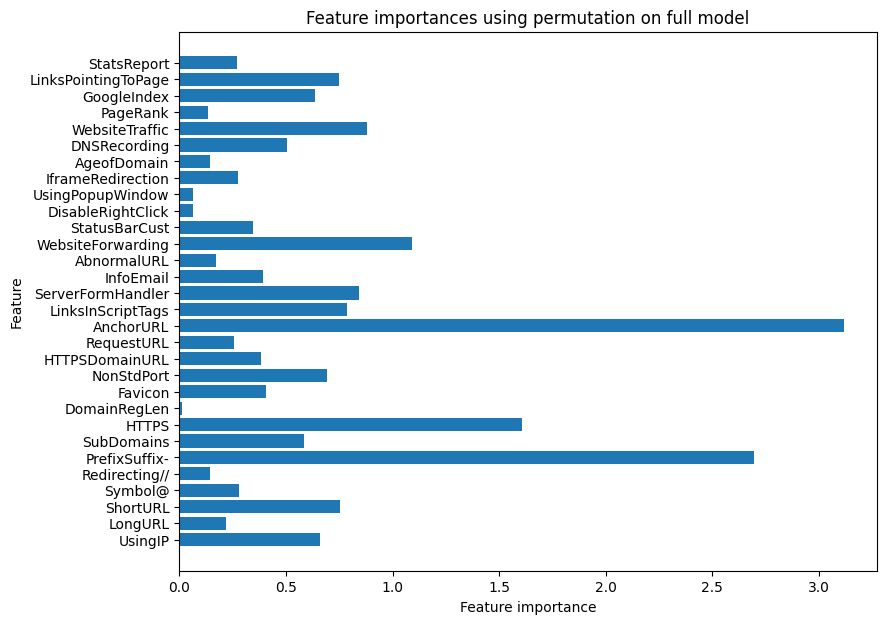

In [199]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), np.abs(log.coef_[0]), align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Logistic Regression with Sequential Feature Selector

In [200]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log1 = LogisticRegression()

In [201]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [202]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log2 = LogisticRegression()

# fit the model 
log2.fit(X_train4,y_train4)
#predicting the target value from the model for the samples

y_train_log = log2.predict(X_train4)
y_test_log = log2.predict(X_test4)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train4,y_train_log)
acc_test_log = metrics.accuracy_score(y_test4,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.926
Logistic Regression : Accuracy on test Data: 0.915

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.922

Logistic Regression : Recall on training Data: 0.947
Logistic Regression : Recall on test Data: 0.934

Logistic Regression : precision on training Data: 0.923
Logistic Regression : precision on test Data: 0.912


In [203]:
storeResults1('Logistic Regression',acc_test_log,f1_score_test_log,recall_score_train_log,precision_score_train_log)

## Support Vector Machine Feature Importance

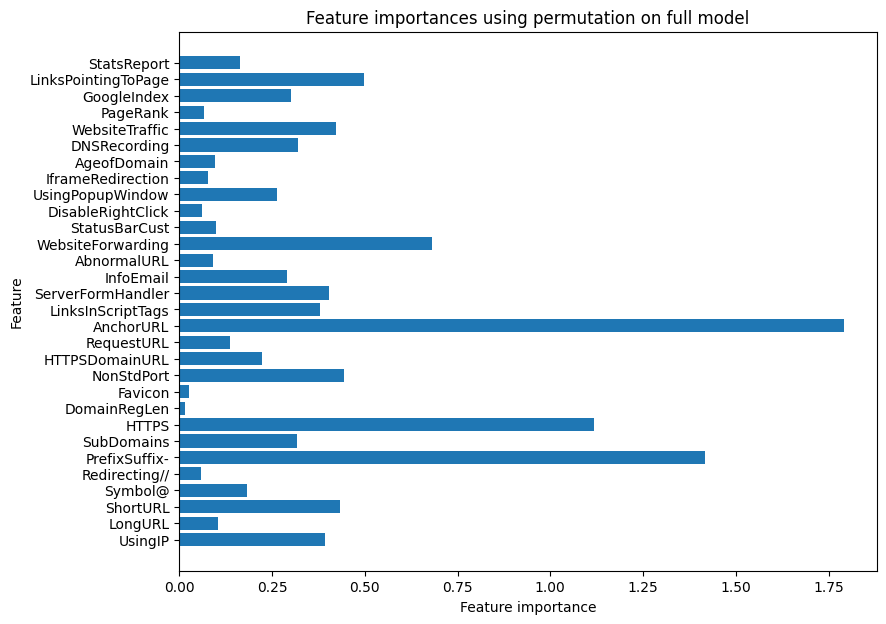

In [204]:
#checking the feature improtance in the model
modell=SVC(kernel='linear')
modell.fit(X_train,y_train)
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), np.abs(modell.coef_[0]), align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Support Vector Machine with Sequential Feature Selector

In [205]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
X_train5.shape, y_train5.shape, X_test5.shape, y_test5.shape

((8000, 20), (8000,), (2001, 20), (2001,))

In [206]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train5, y_train5)
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train5)
y_test_svc = svc.predict(X_test5)

#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train5,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test5,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()
f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.966
Support Vector Machine : Accuracy on test Data: 0.950

Support Vector Machine : f1_score on training Data: 0.969
Support Vector Machine : f1_score on test Data: 0.954

Support Vector Machine : Recall on training Data: 0.979
Support Vector Machine : Recall on test Data: 0.962

Support Vector Machine : precision on training Data: 0.961
Support Vector Machine : precision on test Data: 0.946


In [207]:
storeResults1('Support Vector Machine',acc_test_svc,f1_score_test_svc, recall_score_train_svc,precision_score_train_svc)

In [208]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                        'f1_score' : f1_score1,
                        'Recall'   : recall1,
                        'Precision': precision1,
                      })

In [209]:
result1

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.961,0.964,0.995,0.990
1,Decision Tree,0.936,0.941,0.992,0.993
2,LightGBM,0.959,0.962,0.994,0.990
3,Logistic Regression,0.915,0.922,0.947,0.923
4,Support Vector Machine,0.950,0.954,0.979,0.961


In [210]:
#Sorting the datafram on accuracy
sorted_result1=result1.sort_values(by=['Accuracy','f1_score'],ascending=False).reset_index(drop=True)
sorted_result1

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.961,0.964,0.995,0.990
1,LightGBM,0.959,0.962,0.994,0.990
2,Support Vector Machine,0.950,0.954,0.979,0.961
3,Decision Tree,0.936,0.941,0.992,0.993
4,Logistic Regression,0.915,0.922,0.947,0.923
